In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split as tts
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix,roc_curve

import warnings as w
w.filterwarnings('ignore')

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Machine learning/heart failure.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# New Section

In [ ]:
df.shape

(299, 13)

In [ ]:
df.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

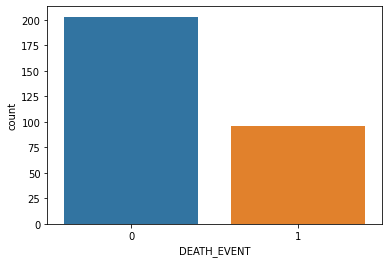

In [ ]:
sns.countplot(df.DEATH_EVENT)

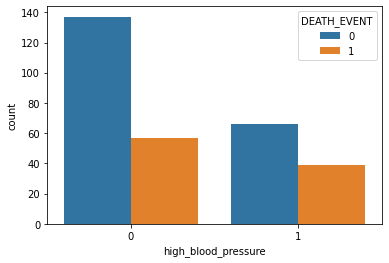

In [ ]:
sns.countplot(x='high_blood_pressure',hue='DEATH_EVENT',data=df)

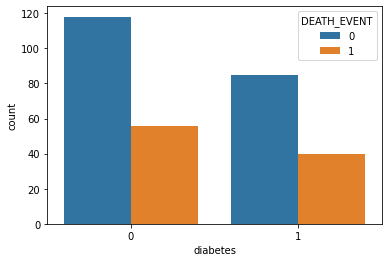

In [ ]:
sns.countplot(x='diabetes',hue='DEATH_EVENT',data=df)

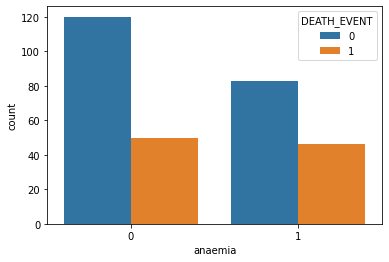

In [ ]:
sns.countplot(x='anaemia',hue='DEATH_EVENT',data=df)

In [ ]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


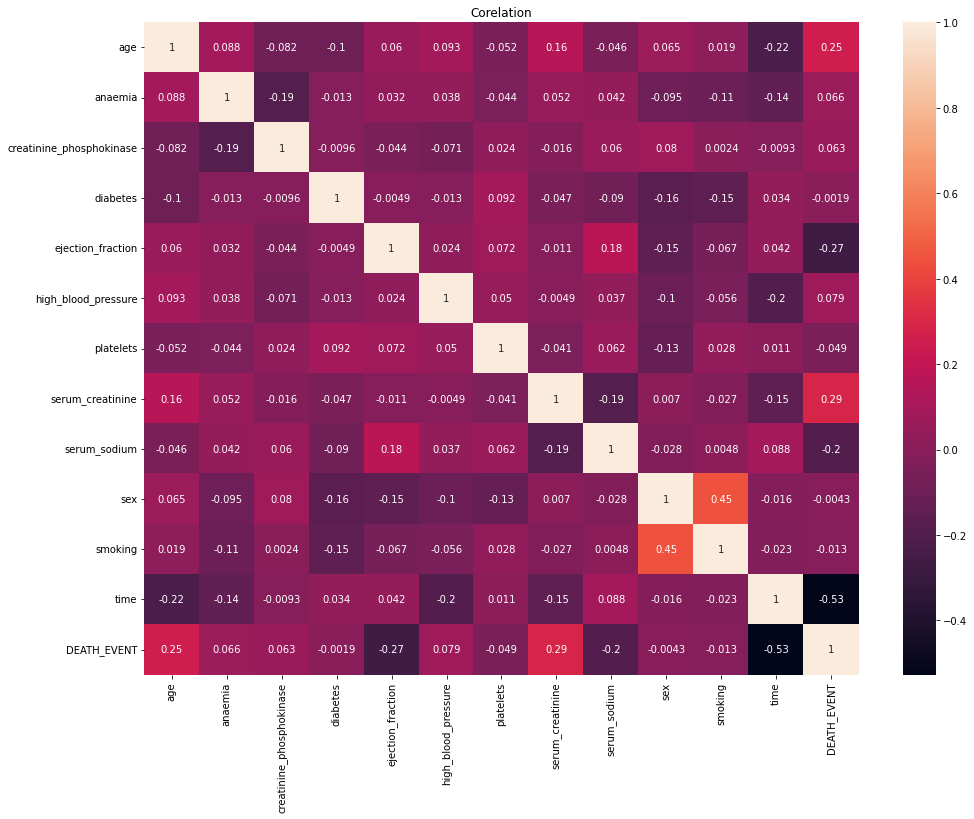

In [ ]:
plt.figure(figsize=(16,12))
plt.title('Corelation')
sns.heatmap(df.corr(),annot=True)#annot is used to show the correlations in numeric form

In [ ]:
x=df.drop('DEATH_EVENT',axis='columns')
x.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [ ]:
y=df[['DEATH_EVENT']]
y.head()

,DEATH_EVENT
0,1
1,1
2,1
3,1
4,1


# Split the dataset into train and test

In [45]:
xtrain,xtest,ytrain,ytest=tts(x,y,test_size=0.3,random_state=1)

In [46]:
xtrain.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
14,49.0,1,80,0,30,1,427000.0,1.0,138,0,0,12
210,70.0,0,212,1,17,1,389000.0,1.0,136,1,1,188
236,75.0,0,119,0,50,1,248000.0,1.1,148,1,0,209
44,60.0,1,588,1,60,0,194000.0,1.1,142,0,0,33
163,50.0,1,2334,1,35,0,75000.0,0.9,142,0,0,126


In [47]:
xtrain.shape

(209, 12)

In [48]:
xtest.shape

(90, 12)

In [49]:
clf=DecisionTreeClassifier()

In [50]:
clf.fit(xtrain,ytrain)

DecisionTreeClassifier()

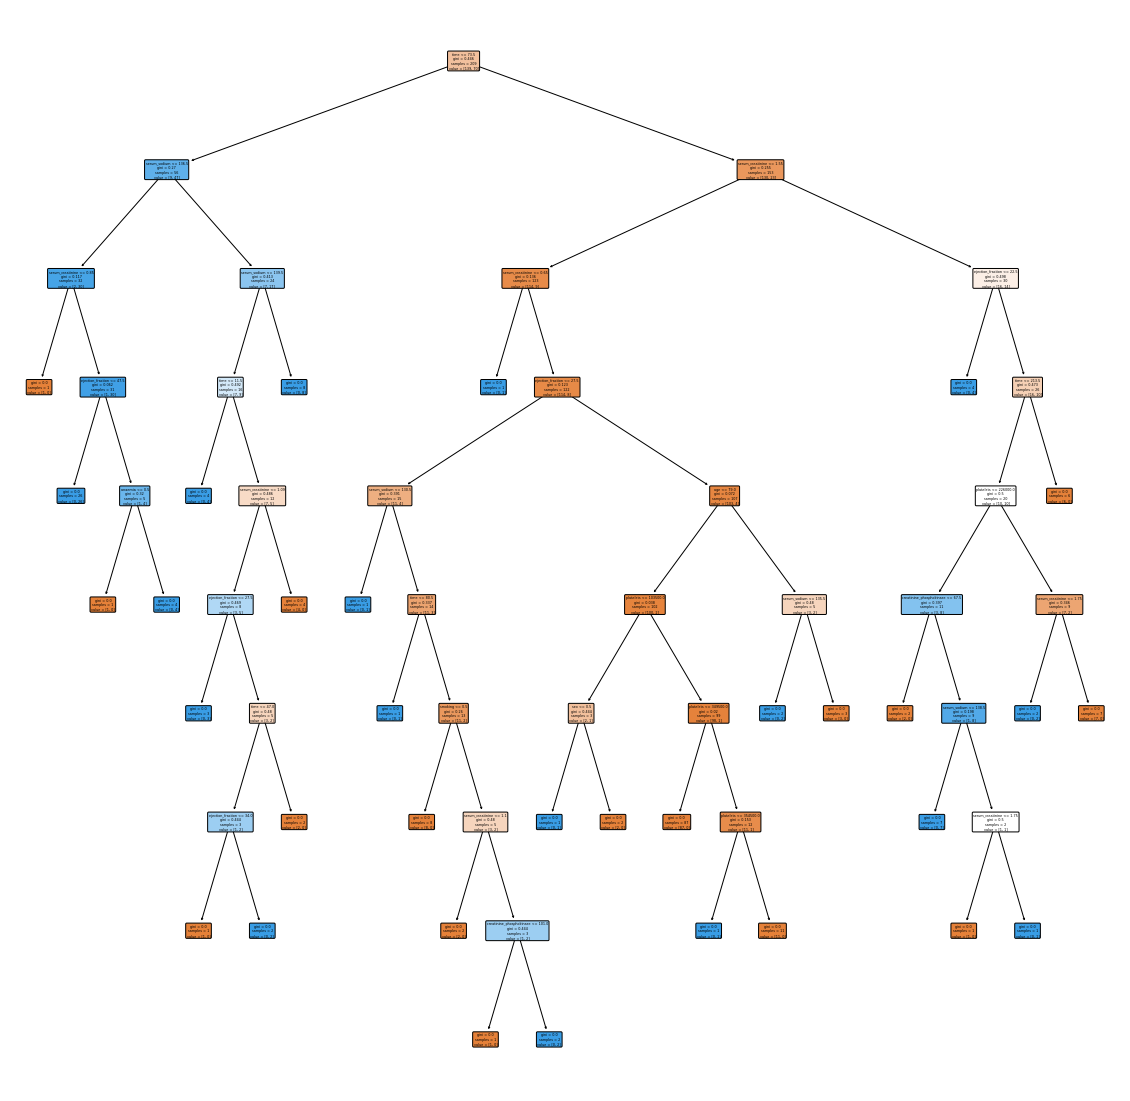

In [51]:
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(clf,filled=True,rounded=True,feature_names=x.columns)
plt.savefig('tree.png',dpi=1200)

In [52]:
pred=clf.predict(xtest)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1])

In [53]:
np.array(ytest)

array([[0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
    

**Confusion** **Matrix**

In [54]:
classification_report(ytest,pred)

'              precision    recall  f1-score   support\n\n           0       0.85      0.89      0.87        64\n           1       0.70      0.62      0.65        26\n\n    accuracy                           0.81        90\n   macro avg       0.77      0.75      0.76        90\nweighted avg       0.81      0.81      0.81        90\n'

In [55]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87        64
           1       0.70      0.62      0.65        26

    accuracy                           0.81        90
   macro avg       0.77      0.75      0.76        90
weighted avg       0.81      0.81      0.81        90



In [56]:
cm=confusion_matrix(ytest,pred)
cm

array([[57,  7],
       [10, 16]])

Text(0.5, 1.0, 'Confusion Matrix')

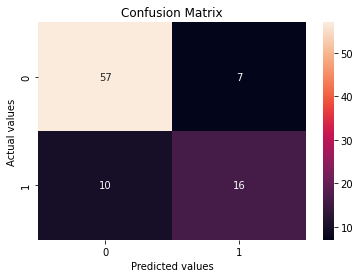

In [57]:
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix')

In [58]:
tp,fp,fn,tn=confusion_matrix(ytest,pred).reshape(-1)

In [59]:
tp

57

In [60]:
fn

10

In [61]:
fp

7

In [62]:
tn

16

**Accuracy**

In [64]:
accuracy=(tp+tn)/(tp+fp+tn+fn)
accuracy

0.8111111111111111

**Precision or Positive predictive value**

In [66]:
ppv=tp/(tp+fp)
ppv

0.890625

**Sensitivity/Recall/True Positive Rate**

In [68]:
tpr=tp/(tp+fn)
tpr

0.8507462686567164

**False Positive Rate**

In [69]:
fpr=fp/(fp+tn)
fpr

0.30434782608695654

**F1 Measure**

In [70]:
f1_measure=(ppv+tpr)/2
f1_measure

0.8706856343283582

**Harmonic Mean/F1 Score**

In [71]:
f1_score=(2*ppv*fpr)/(ppv+fpr)
f1_score

0.45366685616827745

**Specificity/Selectivity/True Negative Rate**

In [72]:
specificity=tn/(tn+fp)
specificity

0.6956521739130435

**Threat Score/Critical Success Index**

In [73]:
csi=tp/(tp+fn+fp)
csi

0.7702702702702703

**False Discovery Rate**

In [74]:
fdr=fp/(tp+fp)
fdr

0.109375

**Balance Accuracy**

In [75]:
tpr=tp/(tp+fn)
tnr=tn/(tn+fp)
BA=(tpr+tnr)/2
BA

0.77319922128488

**Informedness/Bookmaker Informedness(BM)**

In [76]:
BM=tpr+tnr-1
BM

0.5463984425697599

**Markedness(MK)/deltaP**

In [77]:
npv=tn/(tn+fn)
MK=ppv+npv-1
MK

0.5060096153846154

**Matthews correlation coefficient(MCC)**

In [78]:
mcc=((tp*tn)-(fp*fn))/((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))**2
mcc

1.2805607024180083e-10

**Fowlkes-Mallows Index(FM)**

In [79]:
FM=(ppv*tpr)**2
FM

0.5741030700914735